In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import math
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
import numpy as np

In [2]:
df = pd.read_csv('csv/df_cluster.csv')
X = df.values

In [3]:
avrg_sil = []
for k in tqdm(range(4, 10)):
    model = KMeans(n_clusters = k)
    df_model = model.fit(df)
    centroids = df_model.cluster_centers_
    cluster = df_model.labels_
    for c in np.unique(cluster):
        in_cluster = np.where(c == cluster)[0]
        not_in_cluster = np.where(c != cluster)[0]
        #center_in = centroids[c]
        si_score_list = []
        in_cl_d = []
        out_cl_d = []
        for in_1 in in_cluster:
            sum_in = 0
            sum_out = 0
            for in_2 in in_cluster:
                if (X[in_1]!=X[in_2]).all():
                    #print(X[in_1],X[in_2])
                    sum_in += np.linalg.norm(X[in_1]-X[in_2])
            in_cl_d.append(sum_in)
            for out_1 in not_in_cluster:
                sum_out += np.linalg.norm(X[in_1]-X[out_1])
            out_cl_d.append(sum_out)
        for s in range(len(in_cl_d)):
            si_score = (out_cl_d[s] - in_cl_d[s])/max(out_cl_d[s],in_cl_d[s])
            si_score_list.append(si_score)
    avrg_sil.append(np.mean(si_score_list))

100%|████████████████████████████████████████████████████████████████████████████████| 6/6 [1:58:20<00:00, 1183.41s/it]


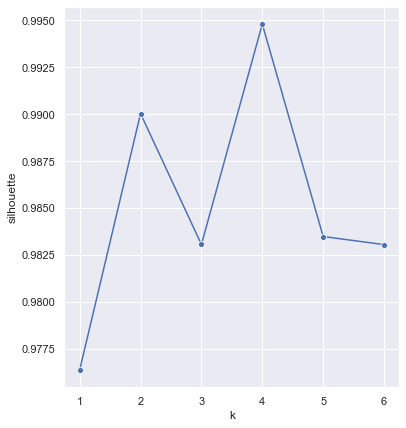

In [6]:
sns.lineplot(x=range(1,len(avrg_sil)+1), y=avrg_sil, marker='o')
sns.set(rc={'figure.figsize':(6,7)})
plt.xlabel('k')
plt.ylabel('silhouette')
plt.show()

In [12]:
avrg_sil

[0.9763695068180942,
 0.9824692394841527,
 0.9784473160250822,
 0.957327477373128,
 0.9947945416497963,
 0.9924689431685233]